In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('Industry_Portfolios.csv',header=0,index_col=0,parse_dates=True)

In [5]:
#VECTOR OF MEAN RETURNS (3 decimals)

In [6]:
R=np.round(np.array([[data['NoDur'].mean()],
                      [data['Durbl'].mean()],
                      [data['Manuf'].mean()],
                      [data['Enrgy'].mean()],
                      [data['HiTec'].mean()],
                      [data['Telcm'].mean()],
                      [data['Shops'].mean()],
                      [data['Hlth'].mean()],
                      [data['Utils'].mean()],
                      [data['Other'].mean()]]),3)

In [7]:
R

array([[0.903],
       [0.733],
       [1.013],
       [1.231],
       [0.766],
       [0.881],
       [0.916],
       [0.784],
       [0.907],
       [0.489]])

In [8]:
#COVARIANCE MATRIX OF RETURNS (3 decimals)

In [9]:
values=data.values.transpose()

In [10]:
V=np.round(np.cov(values),3)
V

array([[11.193, 18.45 , 14.105, 10.531, 12.923, 11.968, 10.171,  9.953,
         7.867, 14.438],
       [18.45 , 69.921, 39.178, 27.02 , 35.467, 27.491, 27.445, 16.824,
        12.746, 39.362],
       [14.105, 39.178, 28.199, 23.145, 24.619, 19.55 , 17.623, 13.596,
        11.441, 26.313],
       [10.531, 27.02 , 23.145, 36.985, 19.267, 15.367, 11.298,  9.63 ,
        14.027, 18.32 ],
       [12.923, 35.467, 24.619, 19.267, 28.957, 18.708, 17.837, 13.254,
        10.304, 23.855],
       [11.968, 27.491, 19.55 , 15.367, 18.708, 19.787, 14.169, 11.507,
        10.992, 19.611],
       [10.171, 27.445, 17.623, 11.298, 17.837, 14.169, 16.759, 10.179,
         6.694, 19.227],
       [ 9.953, 16.824, 13.596,  9.63 , 13.254, 11.507, 10.179, 14.343,
         7.475, 14.865],
       [ 7.867, 12.746, 11.441, 14.027, 10.304, 10.992,  6.694,  7.475,
        13.703,  9.993],
       [14.438, 39.362, 26.313, 18.32 , 23.855, 19.611, 19.227, 14.865,
         9.993, 31.164]])

In [11]:
vector_sd=np.round(np.array([data['NoDur'].std(),
                      data['Durbl'].std(),
                      data['Manuf'].std(),
                      data['Enrgy'].std(),
                      data['HiTec'].std(),
                      data['Telcm'].std(),
                      data['Shops'].std(),
                      data['Hlth'].std(),
                      data['Utils'].std(),
                      data['Other'].std(),]),3)

In [12]:
#TABLE OF MEAN RETURNS

In [13]:
Return = pd.DataFrame(R)
Return.rename(columns = {0:"Mean Returns"},index={0:'NoDur',1:'Durbl',2:'Manuf',3:'Enrgy',4:'Hitec',5:'Telcm',6:'Shops',7:'Hlth',8:'Utils',9:'Other'})

,Mean Returns
NoDur,0.903
Durbl,0.733
Manuf,1.013
Enrgy,1.231
Hitec,0.766
Telcm,0.881
Shops,0.916
Hlth,0.784
Utils,0.907
Other,0.489


In [14]:
#TABLE OF STANDARD DEVIATIONS

In [15]:
sd=pd.DataFrame(vector_sd)
sd.rename(columns={0:"Std Dev"},index = {0:'NoDur',1:'Durbl',2:'Manuf',3:'Enrgy',4:'Hitec',5:'Telcm',6:'Shops',7:'Hlth',8:'Utils',9:'Other'})

,Std Dev
NoDur,3.346
Durbl,8.362
Manuf,5.310
Enrgy,6.082
Hitec,5.381
Telcm,4.448
Shops,4.094
Hlth,3.787
Utils,3.702
Other,5.582


In [16]:
#PLOT MINIMUM-VARIANCE FRONTIER

In [17]:
covariance = pd.DataFrame(V)
covariance

,0,1,2,3,4,5,6,7,8,9
0,11.193,18.450,14.105,10.531,12.923,11.968,10.171,9.953,7.867,14.438
1,18.450,69.921,39.178,27.020,35.467,27.491,27.445,16.824,12.746,39.362
2,14.105,39.178,28.199,23.145,24.619,19.550,17.623,13.596,11.441,26.313
3,10.531,27.020,23.145,36.985,19.267,15.367,11.298,9.630,14.027,18.320
4,12.923,35.467,24.619,19.267,28.957,18.708,17.837,13.254,10.304,23.855
5,11.968,27.491,19.550,15.367,18.708,19.787,14.169,11.507,10.992,19.611
6,10.171,27.445,17.623,11.298,17.837,14.169,16.759,10.179,6.694,19.227
7,9.953,16.824,13.596,9.630,13.254,11.507,10.179,14.343,7.475,14.865
8,7.867,12.746,11.441,14.027,10.304,10.992,6.694,7.475,13.703,9.993
9,14.438,39.362,26.313,18.320,23.855,19.611,19.227,14.865,9.993,31.164


In [18]:
V_inverse = np.linalg.inv(V)

In [19]:
R_prime = R.transpose()

In [20]:
e = np.ones((10,1),dtype = int)

In [21]:
e_prime = e.transpose()

In [22]:
alpha = float(np.matmul(np.matmul(R_prime,V_inverse),e))
alpha

0.13794012453684035

In [33]:
zeta = float(np.matmul(np.matmul(R_prime,V_inverse),R))
zeta

0.19643794416641736

In [34]:
delta=float(np.matmul(np.matmul(e_prime,V_inverse),e))
delta

0.13739136774691937

In [35]:
Rmv = alpha/delta
Rmv

1.0039941140329267

In [26]:
a = (zeta*np.matmul(V_inverse,e)-alpha*np.matmul(V_inverse,R))/(zeta*delta-alpha**2)
a

array([[ 0.49187053],
       [ 0.10830094],
       [-1.9537578 ],
       [-0.01187785],
       [ 0.52972898],
       [-0.25987408],
       [-0.24704134],
       [ 0.2823728 ],
       [ 0.69580145],
       [ 1.36447636]])

In [27]:
b = (delta*np.matmul(V_inverse,R)-alpha*np.matmul(V_inverse,e))/(zeta*delta-alpha**2)
b

array([[ 0.05146637],
       [-0.21697263],
       [ 1.7954127 ],
       [ 0.07787016],
       [-0.60101578],
       [ 0.11024255],
       [ 0.83300987],
       [-0.1388992 ],
       [-0.3789362 ],
       [-1.53217785]])

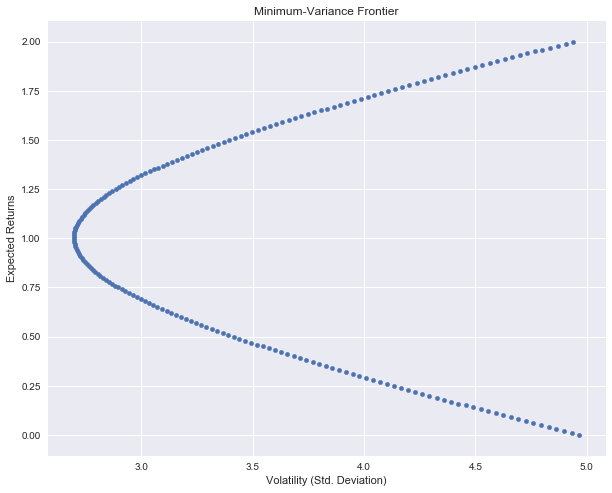

In [28]:
port_returns = []
port_volatility = []

# populate the empty lists with each portfolios returns,risk and weights
for Rp in np.arange(0.0,2.01,0.01):
    volatility = np.sqrt((1/delta)+(delta/((zeta*delta)-alpha**2))*(Rp-Rmv)**2)
    port_returns.append(Rp)
    port_volatility.append(volatility)
    
# dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

plt.style.use('seaborn')
df.plot.scatter(x =  'Volatility', y = 'Returns', figsize = (10, 8), grid = True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Minimum-Variance Frontier')
plt.show()

In [29]:
#PLOT EFFICIENT-FRONTIER (WITH RISKLESS ASSET)

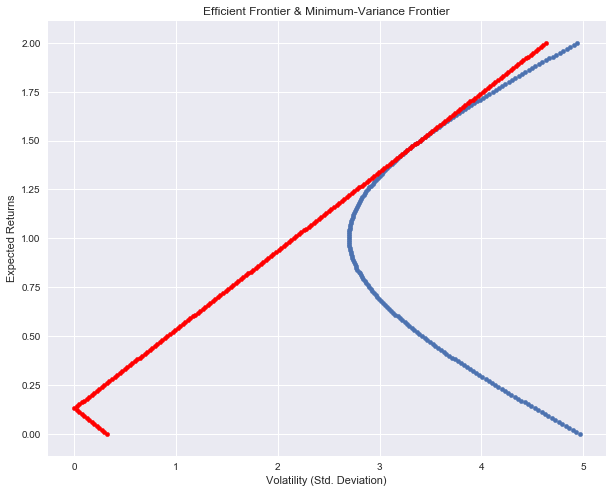

In [30]:
port_returns = []
port_volatility = []
Rf_volatility = []
Rf = 0.13

# populate the empty lists with each portfolios returns,risk and weights
for Rp in np.arange(0.0,2.01,0.01):
    volatility = np.sqrt((1/delta)+(delta/((zeta*delta)-alpha**2))*(Rp-Rmv)**2)
    riskfree_volatility = np.sqrt(((Rp-Rf)**2)/(zeta-2*alpha*Rf+delta*Rf**2))
    port_returns.append(Rp)
    port_volatility.append(volatility)
    Rf_volatility.append(riskfree_volatility)
    
# dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

Rf_portfolio = {'Returns': port_returns,
                'Riskfree_Volatility': Rf_volatility}

# dataframe of the extended dictionary
df = pd.DataFrame(portfolio)
df2 = pd.DataFrame(Rf_portfolio)



plt.style.use('seaborn')

ax = df.plot.scatter(x = 'Volatility', y = 'Returns', figsize = (10, 8), grid=True)
df2.plot.scatter(x = 'Riskfree_Volatility', y = 'Returns',ax = ax, c = 'r', figsize = (10, 8), grid = True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier & Minimum-Variance Frontier')
plt.show()

In [31]:
#WEIGHTS OF TANGENCY PORTFOLIO

In [32]:
Rtg=((alpha*Rf)-zeta)/(delta*Rf-alpha)
weight = a+b*Rtg
weight = pd.DataFrame(weight)
weight.rename(columns = {0:"Weight"},index = {0:'NoDur',1:'Durbl',2:'Manuf',3:'Enrgy',4:'Hitec',5:'Telcm',6:'Shops',7:'Hlth',8:'Utils',9:'Other'})

,Weight
NoDur,0.568379
Durbl,-0.214243
Manuf,0.715242
Enrgy,0.103881
Hitec,-0.363721
Telcm,-0.095991
Shops,0.991283
Hlth,0.075890
Utils,0.132488
Other,-0.913207
